In [1]:
from stingray import lightcurve
import numpy as np
from stingray.bispectrum import Bispectrum
from scipy.io import loadmat, savemat 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

C:\Users\tkalra\AppData\Local\Continuum\anaconda3\lib\site-packages\stingray\crossspectrum.py:21: UserWarning: Using standard scipy fft
  warnings.warn("Using standard scipy fft")


In [2]:
# 1. Read a time stacked image.. with vertical axis as distance and horizontal axis of time - currently done manually 
matstack = loadmat('matfiles_adv/bispectra_Guv_MI.mat') #,'f_FI','fv_post_FI','fv_neg_FI')
                  
#xx = matstack['f_FI']
#times=1/xx 
dt=0.015625  ; # bandwidth
dt=0.001901140684411
#freq = 1 #Hz
exposure = 1  # seconds
times = np.arange(0, exposure, dt)  # seconds
#times=matstack['f_FI']
counts= matstack['fv_post_MI']
print(times)

times=np.squeeze(times)
#times=526
counts=np.squeeze(counts)
print(np.size(times))

[0.         0.00190114 0.00380228 0.00570342 0.00760456 0.0095057
 0.01140684 0.01330798 0.01520913 0.01711027 0.01901141 0.02091255
 0.02281369 0.02471483 0.02661597 0.02851711 0.03041825 0.03231939
 0.03422053 0.03612167 0.03802281 0.03992395 0.0418251  0.04372624
 0.04562738 0.04752852 0.04942966 0.0513308  0.05323194 0.05513308
 0.05703422 0.05893536 0.0608365  0.06273764 0.06463878 0.06653992
 0.06844106 0.07034221 0.07224335 0.07414449 0.07604563 0.07794677
 0.07984791 0.08174905 0.08365019 0.08555133 0.08745247 0.08935361
 0.09125475 0.09315589 0.09505703 0.09695817 0.09885932 0.10076046
 0.1026616  0.10456274 0.10646388 0.10836502 0.11026616 0.1121673
 0.11406844 0.11596958 0.11787072 0.11977186 0.121673   0.12357414
 0.12547529 0.12737643 0.12927757 0.13117871 0.13307985 0.13498099
 0.13688213 0.13878327 0.14068441 0.14258555 0.14448669 0.14638783
 0.14828897 0.15019011 0.15209125 0.1539924  0.15589354 0.15779468
 0.15969582 0.16159696 0.1634981  0.16539924 0.16730038 0.169201

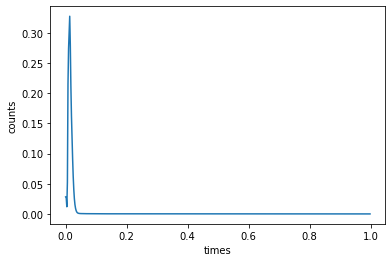

In [3]:

#times = np.arange(1,11)
#counts = np.array([2, 1, 3, 4, 2, 5, 1, 0, 2, 3])


lc = lightcurve.Lightcurve(times,counts)
print(lc)
lc.plot(labels=['times','counts'])

window = 'hanning'

bs = Bispectrum(lc,window = window, scale ='unbiased')#lc.counts

In [4]:
bs.freq


array([-263., -262., -261., -260., -259., -258., -257., -256., -255.,
       -254., -253., -252., -251., -250., -249., -248., -247., -246.,
       -245., -244., -243., -242., -241., -240., -239., -238., -237.,
       -236., -235., -234., -233., -232., -231., -230., -229., -228.,
       -227., -226., -225., -224., -223., -222., -221., -220., -219.,
       -218., -217., -216., -215., -214., -213., -212., -211., -210.,
       -209., -208., -207., -206., -205., -204., -203., -202., -201.,
       -200., -199., -198., -197., -196., -195., -194., -193., -192.,
       -191., -190., -189., -188., -187., -186., -185., -184., -183.,
       -182., -181., -180., -179., -178., -177., -176., -175., -174.,
       -173., -172., -171., -170., -169., -168., -167., -166., -165.,
       -164., -163., -162., -161., -160., -159., -158., -157., -156.,
       -155., -154., -153., -152., -151., -150., -149., -148., -147.,
       -146., -145., -144., -143., -142., -141., -140., -139., -138.,
       -137., -136.,

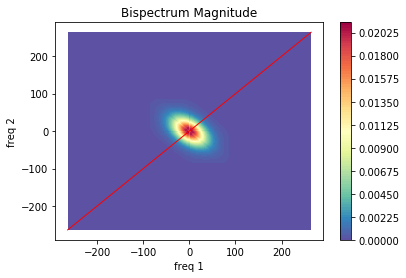

In [5]:
p = bs.plot_mag()
p.plot([-264,264],[-264,264], 'red', linewidth=1)
p.show()

In [6]:
# find the sum of elements under the principal diagonal
# along principal diagonal 
A=bs.bispec_mag
print(np.shape(A))
upper_sum = np.triu(A).sum()-np.trace(A)
lower_sum = np.tril(A).sum()-np.trace(A)
print(lower_sum)
print(upper_sum)

(527, 527)
35.16891031822244
35.168910318222444


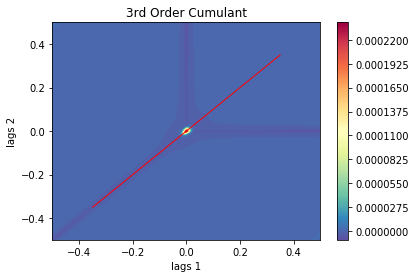

In [7]:
p = bs.plot_cum3()
p.plot([-0.35,0.35],[-0.35,0.35], 'red', linewidth=1)


In [8]:
# find the sum of elements under the principal diagonal
# along principal diagonal 
A=bs.cum3
upper_sum = np.triu(A).sum()-np.trace(A)
lower_sum = np.tril(A).sum()-np.trace(A)
print(lower_sum)

0.0006225807273318874


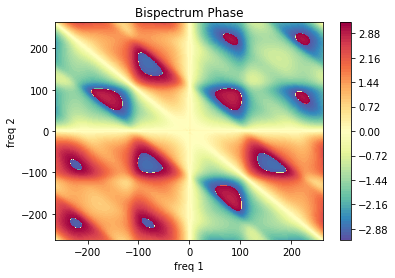

In [9]:
p = bs.plot_phase()


In [10]:
cum_bs=(bs.cum3)
sum_cum_bs=np.sum(cum_bs)
print(sum_cum_bs)
print(np.size(bs.cum3))

0.0018609277513445721
277729


In [11]:
bi_mag=bs.bispec_mag[1]
sum_bispec_mag=np.sum(bi_mag)
print(np.size(bi_mag))

527


In [12]:
print(sum_bispec_mag)

0.0009853661999696113
